In [4]:
# importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



In [18]:
#Read the iris dataset 
iris=pd.read_csv('iris.csv')
iris.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [19]:
#Data Visualization and Analysis👍



In [21]:
iris.shape

(150, 5)

In [25]:
iris['variety'].value_counts()

Versicolor    50
Setosa        50
Virginica     50
Name: variety, dtype: int64

In [26]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [27]:
iris.values

array([[5.1, 3.5, 1.4, 0.2, 'Setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Setosa'],
       [5.4, 3.9, 1.7, 0.4, 'Setosa'],
       [4.6, 3.4, 1.4, 0.3, 'Setosa'],
       [5.0, 3.4, 1.5, 0.2, 'Setosa'],
       [4.4, 2.9, 1.4, 0.2, 'Setosa'],
       [4.9, 3.1, 1.5, 0.1, 'Setosa'],
       [5.4, 3.7, 1.5, 0.2, 'Setosa'],
       [4.8, 3.4, 1.6, 0.2, 'Setosa'],
       [4.8, 3.0, 1.4, 0.1, 'Setosa'],
       [4.3, 3.0, 1.1, 0.1, 'Setosa'],
       [5.8, 4.0, 1.2, 0.2, 'Setosa'],
       [5.7, 4.4, 1.5, 0.4, 'Setosa'],
       [5.4, 3.9, 1.3, 0.4, 'Setosa'],
       [5.1, 3.5, 1.4, 0.3, 'Setosa'],
       [5.7, 3.8, 1.7, 0.3, 'Setosa'],
       [5.1, 3.8, 1.5, 0.3, 'Setosa'],
       [5.4, 3.4, 1.7, 0.2, 'Setosa'],
       [5.1, 3.7, 1.5, 0.4, 'Setosa'],
       [4.6, 3.6, 1.0, 0.2, 'Setosa'],
       [5.1, 3.3, 1.7, 0.5, 'Setosa'],
       [4.8, 3.4, 1.9, 0.2, 'Setosa'],
       [5.0, 3.0, 1.6, 0.

In [30]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
X=iris.iloc[:,:4]
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
y=iris.iloc[:,-1]
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [33]:
# Data normalization
X = preprocessing.StandardScaler().fit_transform(X)
X[0:4]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ]])

In [34]:
# train and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1)
y_test.shape

(45,)

In [35]:
#Training and predicting
knnmodel=KNeighborsClassifier(n_neighbors=3)


In [36]:
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
y_predict1=knnmodel.predict(X_test)

In [39]:
# Accuracy
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_predict1)
acc

0.9777777777777777

In [40]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values,y_predict1)
cm

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  1, 12]], dtype=int64)

In [41]:
cm1=pd.DataFrame(data=cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
cm1

,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,18,0
virginica,0,1,12


In [42]:
prediction_output=pd.DataFrame(data=[y_test.values,y_predict1],index=['y_test','y_predict1'])

In [43]:
prediction_output.transpose()

,y_test,y_predict1
0,Setosa,Setosa
1,Versicolor,Versicolor
2,Versicolor,Versicolor
3,Setosa,Setosa
4,Virginica,Virginica
5,Versicolor,Versicolor
6,Virginica,Virginica
7,Setosa,Setosa
8,Setosa,Setosa
9,Virginica,Virginica


In [44]:
prediction_output.iloc[0,:].value_counts()

Versicolor    18
Setosa        14
Virginica     13
Name: y_test, dtype: int64

In [45]:
# find k value
Ks=50
mean_acc=np.zeros((Ks-1))


#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

In [46]:
print(mean_acc)

[0.95555556 0.95555556 0.97777778 0.95555556 0.95555556 0.97777778
 0.97777778 0.97777778 0.95555556 0.95555556 0.95555556 0.95555556
 0.95555556 0.95555556 0.95555556 0.95555556 0.93333333 0.95555556
 0.95555556 0.95555556 0.91111111 0.93333333 0.91111111 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333 0.93333333
 0.88888889 0.91111111 0.91111111 0.91111111 0.91111111 0.91111111
 0.88888889 0.86666667 0.86666667 0.86666667 0.84444444 0.84444444
 0.8       ]


In [47]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9777777777777777 with k= 3


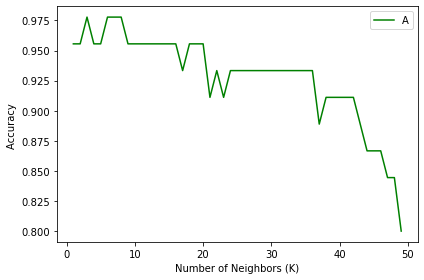

In [48]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()